In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from imblearn.over_sampling import RandomOverSampler
import copy
import seaborn as sns 
import tensorflow as tf

The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information. 

Date : year-month-day
Rented Bike count - Count of bikes rented at each hour
Hour - Hour of he day
Temperature-Temperature in Celsius
Humidity - %
Windspeed - m/s
Visibility - 10m
Dew point temperature - Celsius 
Solar radiation - MJ/m2
Rainfall - mm
Snowfall - cm
Seasons - Winter, Spring, Summer, Autumn
Holiday - Holiday/No holiday
Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

Dua, D. and Graff, C. (2019). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science.

Donated by: P. Savicky Institute of Computer Science, AS of Czech Republic savicky'@'cs.cas.cz

Seoul Bike Sharing Demand. (2020). UCI Machine Learning Repository. https://doi.org/10.24432/C5F62R.

In [21]:
dataset_cols = ["bike_count", "hour", "temp", "humidity", "wind", "visibility", "dew_pt_temp", "radiation", "rain", "snow", "functional"]
# Adjust the path as necessary
file_path = "C:/JPEM_Git_Main/JPEM/JPEM_FreeCodeCamp/data/SeoulBikeData.csv"

try:
    # Trying with a common alternative encoding
    df = pd.read_csv(file_path, encoding='ISO-8859-1').drop(columns=['Date', 'Holiday', 'Seasons'], axis=1)
except UnicodeDecodeError:
    # If ISO-8859-1 doesn't work, you can try another encoding
    df = pd.read_csv(file_path, encoding='cp1252').drop(columns=['Date', 'Holiday', 'Seasons'], axis=1)

df.columns = dataset_cols
df["functional"] = (df["functional"] == "No").astype(int) # one-hot encoding
df = df[df["hour"] == 12]
df =df.drop(["hour"], axis=1)
df.head()

,bike_count,temp,humidity,wind,visibility,dew_pt_temp,radiation,rain,snow,functional
12,449,1.7,23,1.4,2000,-17.2,1.11,0.0,0.0,0
36,479,4.3,41,1.3,1666,-7.8,1.09,0.0,0.0,0
60,333,5.8,85,1.7,349,3.4,0.43,0.0,0.0,0
84,393,-0.3,38,4.8,1823,-12.9,1.11,0.0,0.0,0
108,321,-2.3,25,0.0,1962,-19.7,0.00,0.0,0.0,0


Exploratory Data Analysis:
Create a scatterplot of all the variables to see which ones we should keep and which ones we should drop.

In [ ]:
for label in df.columns[1:]:
    plt.scatter(df[label], df["bike_count"])
    plt.title(label)
    plt.ylabel("Bike Count at Noon")
    plt.xlabel(label)
    plt.show()
    
# After initially plotting all the variables it is obvious that "wind", "visibility" and "functional" 
# serve no purpose in this analysis so we will drop these columns.

df = df.drop(["wind", "visibility", "functional"], axis=1)
df.head()

Training, Validating and testing

In [ ]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

In [37]:
def get_xy(dataframe, y_label, x_labels=None):
    dataframe = copy.deepcopy(dataframe)
    if x_labels is None:
        x = dataframe[[c for c in dataframe.columns if c!=y_label]].values
    else:
        if len(x_labels) == 1:
            x = dataframe[x_labels[0]].values.reshape(-1,1)
        else:
            x = dataframe[x_labels].values
    
    y = dataframe[y_label].values.reshape(-1,1)
    data = np.hstack((x, y))
    
    return data, x, y

In [38]:
_, x_train_temp, y_train_temp = get_xy(train, "bike_count", x_labels=["temp"])
_, x_valid_temp, y_valid_temp = get_xy(valid, "bike_count", x_labels=["temp"])
_, x_test_temp, y_test_temp = get_xy(test, "bike_count", x_labels=["temp"])

In [39]:
temp_regressor = LinearRegression()
temp_regressor.fit(x_train_temp, y_train_temp)

print(f"Coefficient (slope) ", temp_regressor.coef_, "Intercept: ", temp_regressor.intercept_)

print(f"R-Squared: ", temp_regressor.score(x_test_temp, y_test_temp))

Coefficient (slope)  [[22.10878739]] Intercept:  [362.12820892]
R-Squared:  0.3031864380819759


Text(0, 0.5, 'Temperature')

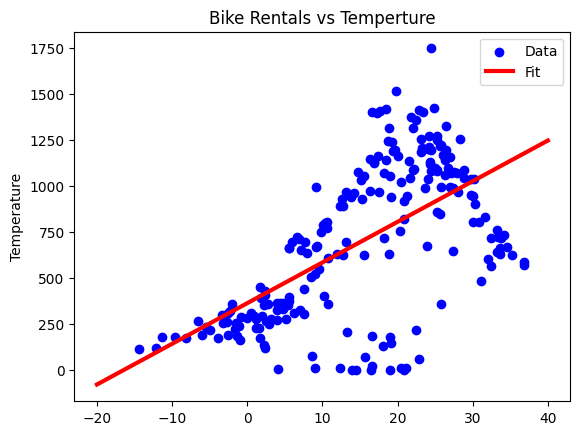

In [40]:
plt.scatter(x_train_temp, y_train_temp, label="Data", color="blue")
x = tf.linspace(-20, 40, 100)
plt.plot(x, temp_regressor.predict(np.array(x).reshape(-1,1)), label="Fit", color="red", linewidth=3)
plt.legend()
plt.title("Bike Rentals vs Temperture")
plt.ylabel("Bike Rentals")
plt.ylabel("Temperature")

Multiple Linear Regression

In [36]:
df.columns

Index(['bike_count', 'temp', 'humidity', 'dew_pt_temp', 'radiation', 'rain',
       'snow'],
      dtype='object')

In [ ]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])
_, x_train_multi, y_train_multi = get_xy(train, "bike_count", x_labels=df.columns[1:])
_, x_valid_multi, y_valid_multi = get_xy(valid, "bike_count", x_labels=df.columns[1:])
_, x_test_multi, y_test_multi = get_xy(test, "bike_count", x_labels=df.columns[1:])

In [ ]:
multi_regressor = LinearRegression()
multi_regressor.fit(x_train_multi, y_train_multi)

multi_regressor.score(x_test_multi, y_test_multi) # improvement from 0.30 to 0.45

Regression with Neural Net